In [335]:
# coding UTF-8
import matplotlib.pyplot as plt
from input_m import read_file, conv_str_to_kana, conv_kana_to_vec, conv_vec_to_kana, conv_kana_to_vec_meta
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd

List = pd.read_csv('dataset_proto.csv')
data = read_file('dataset_proto.csv')
kana_title, kana_ans = conv_str_to_kana(data[0],data[1])
vec_title = conv_kana_to_vec_meta(kana_title,1,"T")
vec_ans = conv_kana_to_vec_meta(kana_ans,1,"R")
List

,Title,Title_kana,Ryaku,Ryaku_kana
0,青の祓魔師,アオノエクソシスト,青エク,アオエク
1,蒼の彼方のフォーリズム,アオノカナタノフォーリズム,あおかな,アオカナ
2,青春ブタ野郎はバニーガール先輩の夢を見ない,セイシュンブタヤロウハバニーガールセンパイノユメヲミナイ,青ブタ,アオブタ
3,創世のアクエリオン,ソウセイノアクエリオン,アクエリ,アクエリ
4,甘城ブリリアントパーク,アマギブリリアントパーク,甘ブリ,アマブリ
5,あの日見た花の名前を僕達はまだ知らない。,アノヒミタハナノナマエヲボクタチハマダシラナイ,あの花,アノハナ
6,Get Ride! アムドライバー,ゲットライドアムドライバー,アムドラ,アムドラ
7,異世界はスマートフォンとともに。,イセカイハスマートフォントトモニ,イセスマ,イセスマ
8,いつか天魔の黒ウサギ,イツカテンマノクロウサギ,いつ天,イツテン
9,イナズマイレブン,イナズマイレブン,イナイレ,イナイレ


In [334]:
List1 = List.copy()
List1['Title_vec'] = vec_title
List1['Title_ans'] = vec_ans

In [323]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=1)
x_pca = pca.fit_transform(vec_title)
y_pca = pca.fit_transform(vec_ans)

In [324]:
List2 = List1.copy()
List2['X'] = x_pca
List2['Y'] = y_pca
List2

,Title,Title_kana,Ryaku,Ryaku_kana,Title_vec,Title_ans,X,Y
0,青の祓魔師,アオノエクソシスト,青エク,アオエク,"[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-0.264134,-0.663987
1,蒼の彼方のフォーリズム,アオノカナタノフォーリズム,あおかな,アオカナ,"[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.397740,-0.746037
2,青春ブタ野郎はバニーガール先輩の夢を見ない,セイシュンブタヤロウハバニーガールセンパイノユメヲミナイ,青ブタ,アオブタ,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.145840,0.110413
3,創世のアクエリオン,ソウセイノアクエリオン,アクエリ,アクエリ,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-0.127314,0.084969
4,甘城ブリリアントパーク,アマギブリリアントパーク,甘ブリ,アマブリ,"[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.111259,0.914063
5,あの日見た花の名前を僕達はまだ知らない。,アノヒミタハナノナマエヲボクタチハマダシラナイ,あの花,アノハナ,"[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.063804,-0.693366
6,Get Ride! アムドライバー,ゲットライドアムドライバー,アムドラ,アムドラ,"[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-0.058168,-0.011035
7,異世界はスマートフォンとともに。,イセカイハスマートフォントトモニ,イセスマ,イセスマ,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.301653,0.014101
8,いつか天魔の黒ウサギ,イツカテンマノクロウサギ,いつ天,イツテン,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.539076,-0.351634
9,イナズマイレブン,イナズマイレブン,イナイレ,イナイレ,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-0.446992,0.103924


In [325]:

from sklearn.cluster import KMeans
model1 = KMeans(n_clusters=5, random_state=0)
data1_X = List2[['X','Y']]
model1.fit(data1_X)
y1 = model1.labels_
print(y1)


[0 0 4 1 1 4 1 1 0 1 1 0 0 0 4 0 0 1 1 3 0 0 1 2 2 0 4 4 4 1 4 0 0 0 0 0 0
 0 0 1 1 0 0 1 0 0 1 0 0 3 0 0 3 3 0 0 0 1 0 3 0 0 1 4 1 1 0 0 0 0 0 0 0 3
 4 1 0 1 3 4 1 1 1 1 1 3 3 3 3 3 3 1 3 1 3 1 1 1 1 1 1 1 1 1 1 0]


In [326]:
"""
from sklearn.cluster import MeanShift
model1 = MeanShift()
data1_X = List2[['X','Y']]
model1.fit(data1_X)
y1 = model1.labels_
print(y1)
"""

"\nfrom sklearn.cluster import MeanShift\nmodel1 = MeanShift()\ndata1_X = List2[['X','Y']]\nmodel1.fit(data1_X)\ny1 = model1.labels_\nprint(y1)\n"

In [327]:
data_results = List2.copy()
data_results['分類結果'] = y1
data_results.sort_values('分類結果')

,Title,Title_kana,Ryaku,Ryaku_kana,Title_vec,Title_ans,X,Y,分類結果
0,青の祓魔師,アオノエクソシスト,青エク,アオエク,"[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-0.264134,-0.663987,0
33,神様はじめました,カミサマハジメマシタ,神はじ,カミサマ,"[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",-0.095137,-1.025756,0
34,神様のメモ帳,カミサマノメモチョウ,神メモ,カミメモ,"[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",0.036469,-1.114667,0
35,翠星のガルガンティア,スイセイノガルガンティア,ガルガン,ガルガン,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",-0.217431,-0.618582,0
36,ガールズ＆パンツァー,ガールズアンドパンツァー,ガルパン,ガルパン,"[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",-0.219643,-0.406213,0
37,彼氏彼女の事情,カレシカノジョノジジョウ,カレカノ,カレカノ,"[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",-0.054991,-1.230362,0
38,彼女がフラグをおられたら,カノジョガフラグヲオラレタラ,がをられ,ガヲラレ,"[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",0.121435,-0.176810,0
41,四月は君の嘘,シガツハキミノウソ,君嘘,キミウソ,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",-0.347348,-0.483615,0
42,君が望む永遠,キミガノゾムエイエン,君望,キミノゾ,"[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",-0.576702,-0.953484,0
44,境界線上のホライゾン,キョウカイセンジョウノホライゾン,境ホラ,キョウホラ,"[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",-0.011873,-0.389617,0


Text(0, 0.5, 'y')

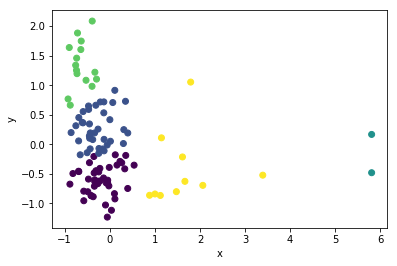

In [328]:
%matplotlib inline
plt.scatter(data_results['X'], data_results['Y'], c=data_results['分類結果'])
plt.xlabel('x')
plt.ylabel('y')

In [329]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 学習用データとテストデータに分けるためのモジュール（正解率を出すため）
from sklearn.model_selection import train_test_split

#トレーニングデータとテストデータを生成
X = data_results[['X','Y']]
Y = data_results[['分類結果']]
#print(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 0)
#X_train

In [330]:
# k-近傍法（k-NN）
from sklearn.neighbors import KNeighborsClassifier

#k-NNインスタンス。今回は3個で多数決。3の値を変更して色々試すと〇
model = KNeighborsClassifier()
#学習モデル構築。引数に訓練データの特徴量と、それに対応したラベル
model.fit(X_train, y_train)

# .scoreで正解率を算出。
print("train score:",model.score(X_train,y_train))
print("test score:",model.score(X_test,y_test))

train score: 0.9642857142857143
test score: 0.8636363636363636


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


In [331]:
# サポートベクターマシン（SVM）
from sklearn.svm import LinearSVC

# SVMインスタンス
model = LinearSVC()
#学習モデル構築。引数に訓練データの特徴量と、それに対応したラベル
model.fit(X_train, y_train)

# .scoreで正解率を算出。
print("train score:",model.score(X_train,y_train))
print("test score:",model.score(X_test,y_test))

train score: 0.9047619047619048
test score: 0.9090909090909091


/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [332]:
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression

# ロジスティック回帰インスタンス
model = LogisticRegression()
#学習モデル構築。引数に訓練データの特徴量と、それに対応したラベル
model.fit(X_train, y_train)

# .scoreで正解率を算出。
print("train score:",model.score(X_train,y_train))
print("test score:",model.score(X_test,y_test))

train score: 0.8690476190476191
test score: 0.9545454545454546


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
